## Imports And Some Settings

In [1]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True))
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 980, pci bus id: 0000:26:00.0, compute capability: 5.2
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



## Loading Data With sklearn. Creating Train, And Val Datasets

    1. CRIM - per capita crime rate by town
    2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS - proportion of non-retail business acres per town.
    4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    5. NOX - nitric oxides concentration (parts per 10 million)
    6. RM - average number of rooms per dwelling
    7. AGE - proportion of owner-occupied units built prior to 1940
    8. DIS - weighted distances to five Boston employment centres
    9. RAD - index of accessibility to radial highways
    10. TAX - full-value property-tax rate per 10,000 USD
    11. PTRATIO - pupil-teacher ratio by town
    12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT - % lower status of the population
    14. MEDV - Median value of owner-occupied homes in 1000's USD

In [2]:
boston_dataset = load_boston()
boston_keys = boston_dataset.keys()

X_dataset = boston_dataset['data']
y_dataset = boston_dataset['target']

float_test_size = 0.2
border = int(X_dataset.shape[0] * (1 - float_test_size))

print("Train dataset size:", border)
print("Test dataset size:", X_dataset.shape[0] - border)

Train dataset size: 404
Test dataset size: 102


## Make pd.dataFrames From nd.arrays

In [3]:
def ndarray_to_dataFrame(data, labels=None):
    '''
    Convert numpy array (numpy.ndarray) dataset
    into pandas DataFrame (pandas.core.frame.DataFrame)
    :param data: np array to convert
    :param labels: verical column names
    :return: DataFrame dataset
    '''
    index = np.arange(0,data.shape[0],1)
    return pd.DataFrame(data=data, index=index, columns=labels)

In [4]:
x_columns_names = boston_dataset['feature_names']
y_column_name = np.array(['PRICE'])
X_dataset = ndarray_to_dataFrame(X_dataset, x_columns_names)
y_dataset = ndarray_to_dataFrame(y_dataset, y_column_name)

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size = float_test_size, random_state = 42)

## Dataset Preview

In [5]:
ds = pd.DataFrame.join(X_train, y_train)
ds[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
325,0.19186,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08,24.6
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
437,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45,8.7
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5


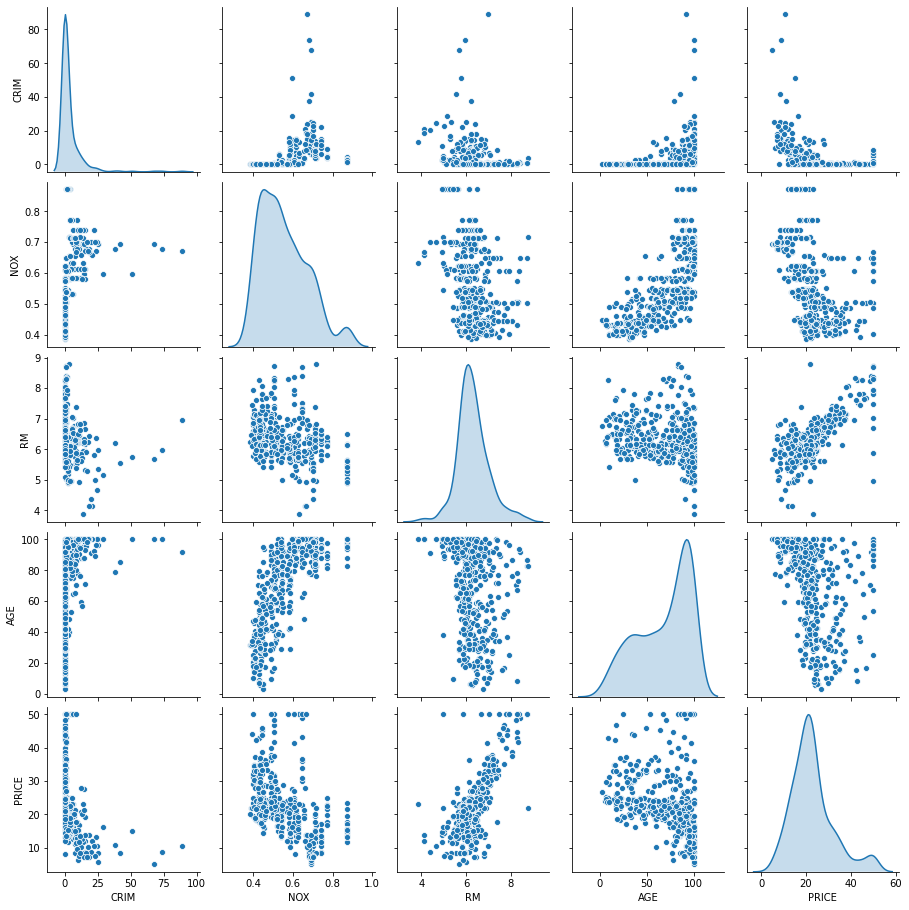

In [6]:
sns.pairplot(ds[["CRIM", "NOX", "RM", "AGE", "PRICE"]], diag_kind="kde")

In [7]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609125,8.875058,0.00906,0.081437,0.26139,3.202962,88.9762
ZN,404.0,11.569307,23.152481,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,10.985050,6.894618,0.74000,5.130000,8.56000,18.100000,27.7400
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.53800,0.631000,0.8710
RM,404.0,6.315891,0.709452,3.86300,5.890500,6.21000,6.636750,8.7800
AGE,404.0,68.556436,27.994922,2.90000,45.550000,77.70000,93.650000,100.0000
DIS,404.0,3.808195,2.131226,1.12960,2.087875,3.17575,5.400800,12.1265
RAD,404.0,9.356436,8.589721,1.00000,4.000000,5.00000,12.000000,24.0000
TAX,404.0,404.032178,166.172655,187.00000,279.000000,330.00000,666.000000,711.0000


## Dataset Normalization

In [8]:
def norm(x):
    '''
    Sometimes given dataset contains real numbers
    from range like [-69.000.000, +420]. We don't want that,
    so we normalize the data, so computer uses data from range
    like: [-1,1] or [-10, 10] or sth just like this. 
    This is called /normalization/
    :param x: dataset to normalize
    :return: normalized dataset
    '''
    train_stats = x.describe().transpose()
    return (x - train_stats['mean']) / train_stats['std']

In [9]:
X_train = norm(X_train)
y_train = norm(y_train)
X_test = norm(X_test)
y_test = norm(y_test)

## Tensorflow Regression: Implementation

In [10]:
advanced_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_columns_names)]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

advanced_model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

advanced_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = advanced_model.fit(
    X_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.6957,  mae:0.5623,  mse:0.6957,  val_loss:0.3597,  val_mae:0.4106,  val_mse:0.3597,  
............................................

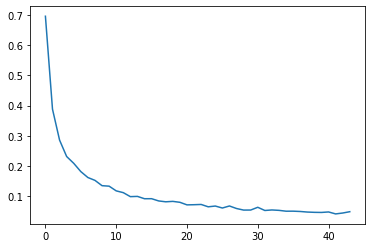

In [12]:
plt.plot(history.history['loss'])
plt.show()

In [13]:
test_history = advanced_model.evaluate(X_test, y_test, return_dict=True)
print("NN: Mae:", test_history['mae'])
print("NN: Mse:", test_history['mse'])

4/4 [==============================] - 0s 1ms/step - loss: 0.1497 - mae: 0.2478 - mse: 0.1497
NN: Mae: 0.24782325473120384
NN: Mse: 0.14971884852251327


## Hand-made Linear Regression: Implementation (Normal Eqaution)

In [14]:
def mean_squared_error(X, y, thetas):
    '''
    Calculates mean squared error from given data (X),
    given true results (y) and parameters (thetas)
    :param X: given data
    :param thetas: parameters / wages / a,b,c ... in polynomial
    :param y: true results
    :return: error value
    '''
    return 1 / len(X) * np.sum((y - (X@thetas).reshape((X.shape[0],1))) ** 2)

def mean_absolute_error(X, y, thetas):
    '''
    Calculates mean absolute error from given data (X),
    given true results (y) and parameters (thetas)
    :param X: given data
    :param thetas: parameters / wages / a,b,c ... in polynomial
    :param y: true results
    :return: error value
    '''
    return 1 / len(X) * np.sum(abs(y - (X@thetas).reshape((X.shape[0],1))))

def normal_equation(X, y, reg_lambda):
    '''
    Calculates best parameters for given data and true valeus,
    it takes into consideration value of regularization lambda
    :param X: given data
    :param reg_lambda: regularization lambda
    :param y: true results
    :return: best fitting parameters
    '''
    li = np.eye(X.shape[1]) * reg_lambda
    return np.linalg.inv(X.T @ X + li) @ X.T @ y

## Hand-made Linear Regression: Model Selection

In [15]:
lambdas = [0,1e-29,5e-29,1e-28,5e-28,1e-27,5e-27,1e-26,5e-26,1e-25,5e-25,1e-24,5e-24,1e-23,5e-23,1e-22,1e-22,
           1e-21,5e-21,1e-20,5e-20,1e-19,5e-19,1e-18,5e-18,1e-17,5e-17,1e-16,5e-16,1e-15,5e-15,1e-14,5e-14,
           1e-13,5e-13,1e-12,5e-12,1e-11,5e-11,1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-6,5e-6,
           1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1e-0,5e-0,1e1,5e1,1e2,5e2,1e3,5e3,1e4,5e4]

best_lambda = -1
best_results = (69e69,420e420)
# best_results = (best_mae, best_mse)

Xt, yt = X_train.values, y_train.values
Xv, yv = X_test.values, y_test.values

Xt = np.concatenate((np.ones((Xt.shape[0], 1)), Xt), axis=1)
Xv = np.concatenate((np.ones((Xv.shape[0], 1)), Xv), axis=1)

In [16]:
for la in lambdas:
    thetas = normal_equation(Xt, yt, la)
    buf_mae = mean_absolute_error(Xv, yv, thetas)
    buf_mse = mean_squared_error(Xv, yv, thetas)
    if best_results[1] > buf_mse:
        best_results = (buf_mae, buf_mse)
        best_lambda = la

print("NE: Best lambda:", best_lambda)
print("NE: Mae: ", best_results[0])
print("NE: Mse: ", best_results[1])

NE: Best lambda: 1e-13
NE: Mae:  0.3735616770461443
NE: Mse:  0.3240651853716649


## Conclusion: Neural Network > Normal Equation
Results are not so satisfying. I was almost 100% sure, that Normal Equation would
be much better than a simple Neural Network. This notebook will not end with
plots/graphs, becouse there is not so much to compare.


Final results - I round them to 4 decimal places:

    Normal Equation → mean absolute error → 0.3736
    Normal Equation → mean squared error  → 0.3241
    Neural Network  → mean absolute error → 0.2478
    Neural Network  → mean squared error  → 0.1497